In [11]:
from abc import ABC, abstractmethod

class AbstractOperation(ABC):

    @abstractmethod
    def run(self, x) -> float:
        pass

    @abstractmethod
    def diff(self): # returns AbstractOperation
        pass

    def terms(self):
        pass

    @abstractmethod
    def __str__(self) -> str:
        return ""

class Const(AbstractOperation):

    c: float

    def __init__(self, c: float):
        super().__init__()
        self.c = c

    def run(self, x):
        return self.c
    
    def diff(self):
        return Const(0)
    
    def terms(self):
        return 1
    
    def __str__(self) -> str:
        return str(self.c)

class X(AbstractOperation):

    def run(self, x) -> float:
        return x
    
    def diff(self):
        return Const(1)

    def terms(self):
        return 1
    
    def __str__(self) -> str:
        return "x"

class Add(AbstractOperation):

    a: AbstractOperation
    b: AbstractOperation

    def __init__(self, a: AbstractOperation, b: AbstractOperation):
        super().__init__()
        self.a = a
        self.b = b

    def run(self, x) -> float:
        return self.a.run(x) + self.b.run(x)
    
    def diff(self):
        return Add(self.a.diff(), self.b.diff())

    def terms(self):
        return self.a.terms() + self.b.terms()

    def __str__(self) -> str:
        return "(" + str(self.a) + " + " + str(self.b) + ")"

class Sub(AbstractOperation):

    a: AbstractOperation
    b: AbstractOperation

    def __init__(self, a: AbstractOperation, b: AbstractOperation):
        super().__init__()
        self.a = a
        self.b = b

    def run(self, x) -> float:
        return self.a.run(x) - self.b.run(x)
    
    def diff(self):
        return Sub(self.a.diff(), self.b.diff())

    def terms(self):
        return self.a.terms() + self.b.terms()
    
    def __str__(self) -> str:
        return "(" + str(self.a) + " - " + str(self.b) + ")"

class Mult(AbstractOperation):

    a: AbstractOperation
    b: AbstractOperation

    def __init__(self, a: AbstractOperation, b: AbstractOperation):
        super().__init__()
        self.a = a
        self.b = b

    def run(self, x) -> float:
        return self.a.run(x) * self.b.run(x)
    
    def diff(self):
        return Add(Mult(self.a.diff(), self.b), Mult(self.a, self.b.diff()))

    def terms(self):
        return self.a.terms() + self.b.terms()
    
    def __str__(self) -> str:
        return "(" + str(self.a) + " * " + str(self.b) + ")"

class Div(AbstractOperation):

    a: AbstractOperation
    b: AbstractOperation

    def __init__(self, a: AbstractOperation, b: AbstractOperation):
        super().__init__()
        self.a = a
        self.b = b

    def run(self, x) -> float:
        return self.a.run(x) / self.b.run(x)
    
    def diff(self):
        return Div(Add(Mult(self.a.diff(), self.b), Mult(self.a, self.b.diff())), Mult(self.b, self.b))

    def terms(self):
        return self.a.terms() + self.b.terms()
    
    def __str__(self) -> str:
        return "(" + str(self.a) + " / " + str(self.b) + ")"

In [12]:
f = Div(Const(1), X())

print(f)
print(f.run(2))
print(f.run(3))
print(f.diff())
print(f.diff().run(2))
print(f.diff().diff())
print(f.diff().diff().run(1))
print(f.terms())
print(f.diff().terms())

(1 / x)
0.5
0.3333333333333333
(((0 * x) + (1 * 1)) / (x * x))
0.25
((((((0 * x) + (0 * 1)) + ((0 * 1) + (1 * 0))) * (x * x)) + (((0 * x) + (1 * 1)) * ((1 * x) + (x * 1)))) / ((x * x) * (x * x)))
2.0
2
6


In [13]:
import numpy as np

class Tanh(AbstractOperation):

    a: AbstractOperation

    def __init__(self, a: AbstractOperation):
        super().__init__()
        self.a = a

    def run(self, x) -> float:
        return np.tanh(self.a.run(x))
    
    def diff(self):
        return Mult(Sub(Const(1), Mult(Tanh(self.a), Tanh(self.a))), self.a.diff())

    def terms(self):
        return 1 + self.a.terms()
    
    def __str__(self) -> str:
        return "tanh(" + str(self.a) + ")"

In [14]:
f1 = Tanh(Add(Mult(Const(1), X()), Const(2)))

print(f1.terms())
print(f1.diff().terms())

f2 = Tanh(Add(Mult(Const(3), f1), Const(4)))

print(f2.terms())
print(f2.diff().terms())

f3 = Tanh(Add(Mult(Const(5), f2), Const(6)))

print(f3.terms())
print(f3.diff().terms())

f4 = Tanh(Add(Mult(Const(5), f3), Const(6)))

print(f4.terms())
print(f4.diff().terms())
print(f4.diff())

4
14
7
36
10
67
13
107
((1 - (tanh(((5 * tanh(((5 * tanh(((3 * tanh(((1 * x) + 2))) + 4))) + 6))) + 6)) * tanh(((5 * tanh(((5 * tanh(((3 * tanh(((1 * x) + 2))) + 4))) + 6))) + 6)))) * (((0 * tanh(((5 * tanh(((3 * tanh(((1 * x) + 2))) + 4))) + 6))) + (5 * ((1 - (tanh(((5 * tanh(((3 * tanh(((1 * x) + 2))) + 4))) + 6)) * tanh(((5 * tanh(((3 * tanh(((1 * x) + 2))) + 4))) + 6)))) * (((0 * tanh(((3 * tanh(((1 * x) + 2))) + 4))) + (5 * ((1 - (tanh(((3 * tanh(((1 * x) + 2))) + 4)) * tanh(((3 * tanh(((1 * x) + 2))) + 4)))) * (((0 * tanh(((1 * x) + 2))) + (3 * ((1 - (tanh(((1 * x) + 2)) * tanh(((1 * x) + 2)))) * (((0 * x) + (1 * 1)) + 0)))) + 0)))) + 0)))) + 0))


In [27]:
import numpy as np
import matplotlib.pyplot as plt

def derivative_check(f, grad_f, positive_only, dim):

    if positive_only:
        x = np.random.rand(dim)
        v = np.random.rand(dim)
    else:
        x = np.random.randn(dim)
        v = np.random.randn(dim)

    max_iters = 32
    h = np.zeros(max_iters)
    err0 = np.zeros(max_iters)
    err1 = np.zeros(max_iters)

    for i in range(max_iters):
        h[i] = 2**(-i) # halve our stepsize every time

        fv = f(x + h[i]*v)
        T0 = f(x)

        T1 = T0 + h[i]*np.matmul(grad_f(x).transpose(), v)

        err0[i] = np.linalg.norm(fv - T0) # this error should be linear
        err1[i] = np.linalg.norm(fv - T1) # this error should be quadratic

        #print('h = ', h, ', err0 = ', err0[i], ', err1 = ', err1[i])

        #print('h: %.3e, \t err0: %.3e, \t err1: %.3e' % (h[i], err0[i], err1[i]))

    plt.loglog(h, err0, linewidth=3)
    plt.loglog(h, err1, linewidth=3)
    plt.legend(['$\|f(x) - T_0(x)\|$', '$\|f(x)-T_1(x)\|$'], fontsize=15)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)

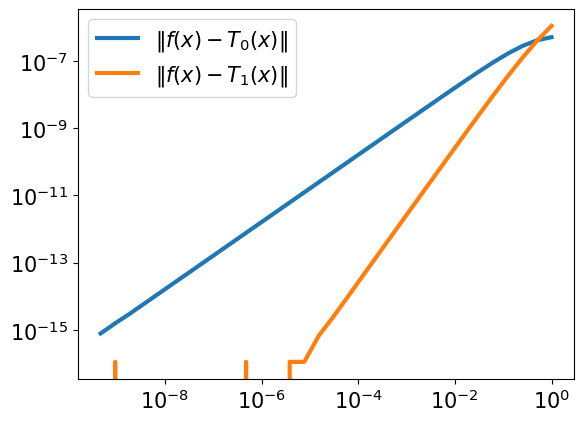

In [28]:
def run_f(x):
    return np.array(f2.run(x))

def run_f_prime(x):
    return np.array(f2.diff().run(x))

derivative_check(run_f, run_f_prime, False, 1)